/usr/local/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
/usr/local/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_label : Removed 30 rows containing missing values.


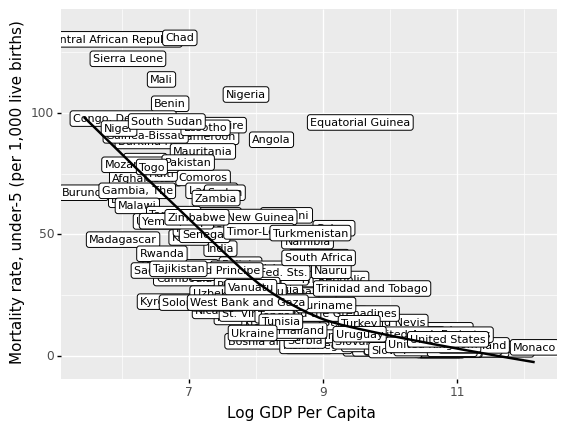

<ggplot: (321219783)>

In [7]:
######################
#
# Import World Development Indicators
# and look at the relationship between income
# and health outcomes across countries
# 
######################

import pandas as pd
import numpy as np

# Download World Development Indicators
wdi = pd.read_csv("wdi_small_tidy_2015.csv")

# GDP Per Capita has a REALLY long right tail, so we want to log it for readability. 
wdi['Log GDP Per Capita'] = np.log(wdi['GDP per capita (constant 2010 US$)'])

# Plot
from plotnine import *

(ggplot(wdi, 
        aes('Log GDP Per Capita', 'Mortality rate, under-5 (per 1,000 live births)')) + 
        geom_point() + 
        geom_label(aes(label='Country Name'), size=8) + 
        geom_smooth()
    )


# Learning from Outliers
While we are often interested in overall trends, exceptions to a trend can sometimes be just as interesting.

Suppose you are an analyst asked to advise the goverment of Mozambique (which has a Log GDP Per Capita of about 6.25) on how it could reduce it's child mortality, but you don't know where to being. One option is to look for other countries whose income level is similar to that of Mozambique, but who have lower mortality levels.

Re-make the plot from above, but this time including only countries with income levels similar to that of Mozambique. Then below the plot, create a markdown cell in which you explain what countries you might research and why.

NOTE: you don't really need to understand the plot command yet: just subset the dataframe used for plotting to only include the observations you want, then use the same code!

In [8]:
wdi.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Battle-related deaths (number of people),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Log GDP Per Capita
0,Afghanistan,73.1264,NaN,17273.0,3.5,2.5,3.0,3.0,3.0,3.0,...,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,NaN,6.352950
1,Albania,20.6922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3,8.417303
2,Algeria,10.7052,28.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.8,8.471524
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.193744
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.639874


In [9]:
# Check Mozambique
cond1 = wdi['Country Name'] == 'Mozambique'
wdi[cond1]

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Battle-related deaths (number of people),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Log GDP Per Capita
134,Mozambique,142.6462,84.0,NaN,4.0,3.0,3.5,3.833333,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,16.8,52.9,61.1,6.271161


In [13]:
# Get Mozambique Log GDP Per Capita
mozambique_gdp = wdi[wdi['Country Name'] == 'Mozambique']['Log GDP Per Capita'].values[0]
mozambique_gdp

6.271160548864118

In [22]:
# Filter countries with Log GDP Per Capita +/- 10% of Mozambique
cond1 = np.abs(1 - wdi['Log GDP Per Capita']/mozambique_gdp) < 0.1
subset_df = wdi[cond1].copy()
subset_df.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Battle-related deaths (number of people),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Log GDP Per Capita
0,Afghanistan,73.1264,NaN,17273.0,3.5,2.5,3.0,3.000000,3.0,3.0,...,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,NaN,6.352950
20,Benin,90.2036,68.0,NaN,3.5,3.5,4.0,3.833330,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.7,6.718814
30,Burkina Faso,108.7606,83.0,NaN,3.5,3.5,4.0,3.833333,3.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6.469824
37,Central African Republic,107.7732,54.0,NaN,2.5,2.0,3.0,3.000000,2.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.2,5.855548
38,Chad,167.9420,64.0,275.0,2.5,2.5,3.5,3.166670,3.0,2.5,...,73.5,49.8,48.6,59.0,59.7,40.6,29.7,66.9,60.5,6.862473


In [24]:
# What percent of total countries have we selected?
subset_df.shape[0]/wdi.shape[0]

0.11981566820276497

/usr/local/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


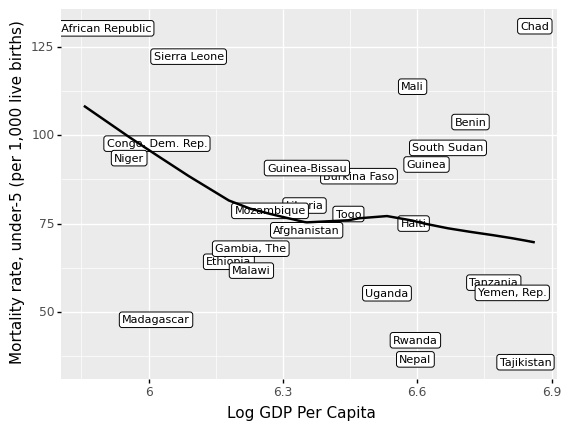

<ggplot: (321549960)>

In [25]:
# Plot the new chart
(ggplot(subset_df, 
        aes('Log GDP Per Capita', 'Mortality rate, under-5 (per 1,000 live births)')) + 
        geom_point() + 
        geom_label(aes(label='Country Name'), size=8) + 
        geom_smooth()
    )

I would recommend studying `Madagascar, Rwanda, Nepal and Tajikistan` which are the countries with similar GDP of Mozambique with the lowest Infant Mortality